In [1]:
# !sudo apt install tesseract-ocr
# !pip install pytesseract
# !pip install Pillow
# !pip install pdf2image
# !sudo apt-get install poppler-utils
# !pip install keras-ocr -q

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 19 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 3s (1,809 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [2]:
# !pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 4.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72


In [1]:
## Import necessary lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('dark_background')

# from google.colab.patches import cv2_imshow
import cv2
from PIL import Image
import pytesseract as pyt
from pdf2image import convert_from_path
# import easyocr
# import keras_ocr

In [4]:
sample1_pdf = '/content/drive/MyDrive/Datasets/ocr-demo/Invoice_bill_scanned.pdf'

## Convert PDF Scanned Images

In [5]:
pages = convert_from_path(sample1_pdf)
for page in pages:
  page.save('/content/drive/MyDrive/Datasets/ocr-demo/Invoice_Bill_Scanned.jpg', 'JPEG')

In [6]:
sample1_jpg = '/content/drive/MyDrive/Datasets/ocr-demo/Invoice_Bill_Scanned.jpg'

Invoice_Bill_Scanned


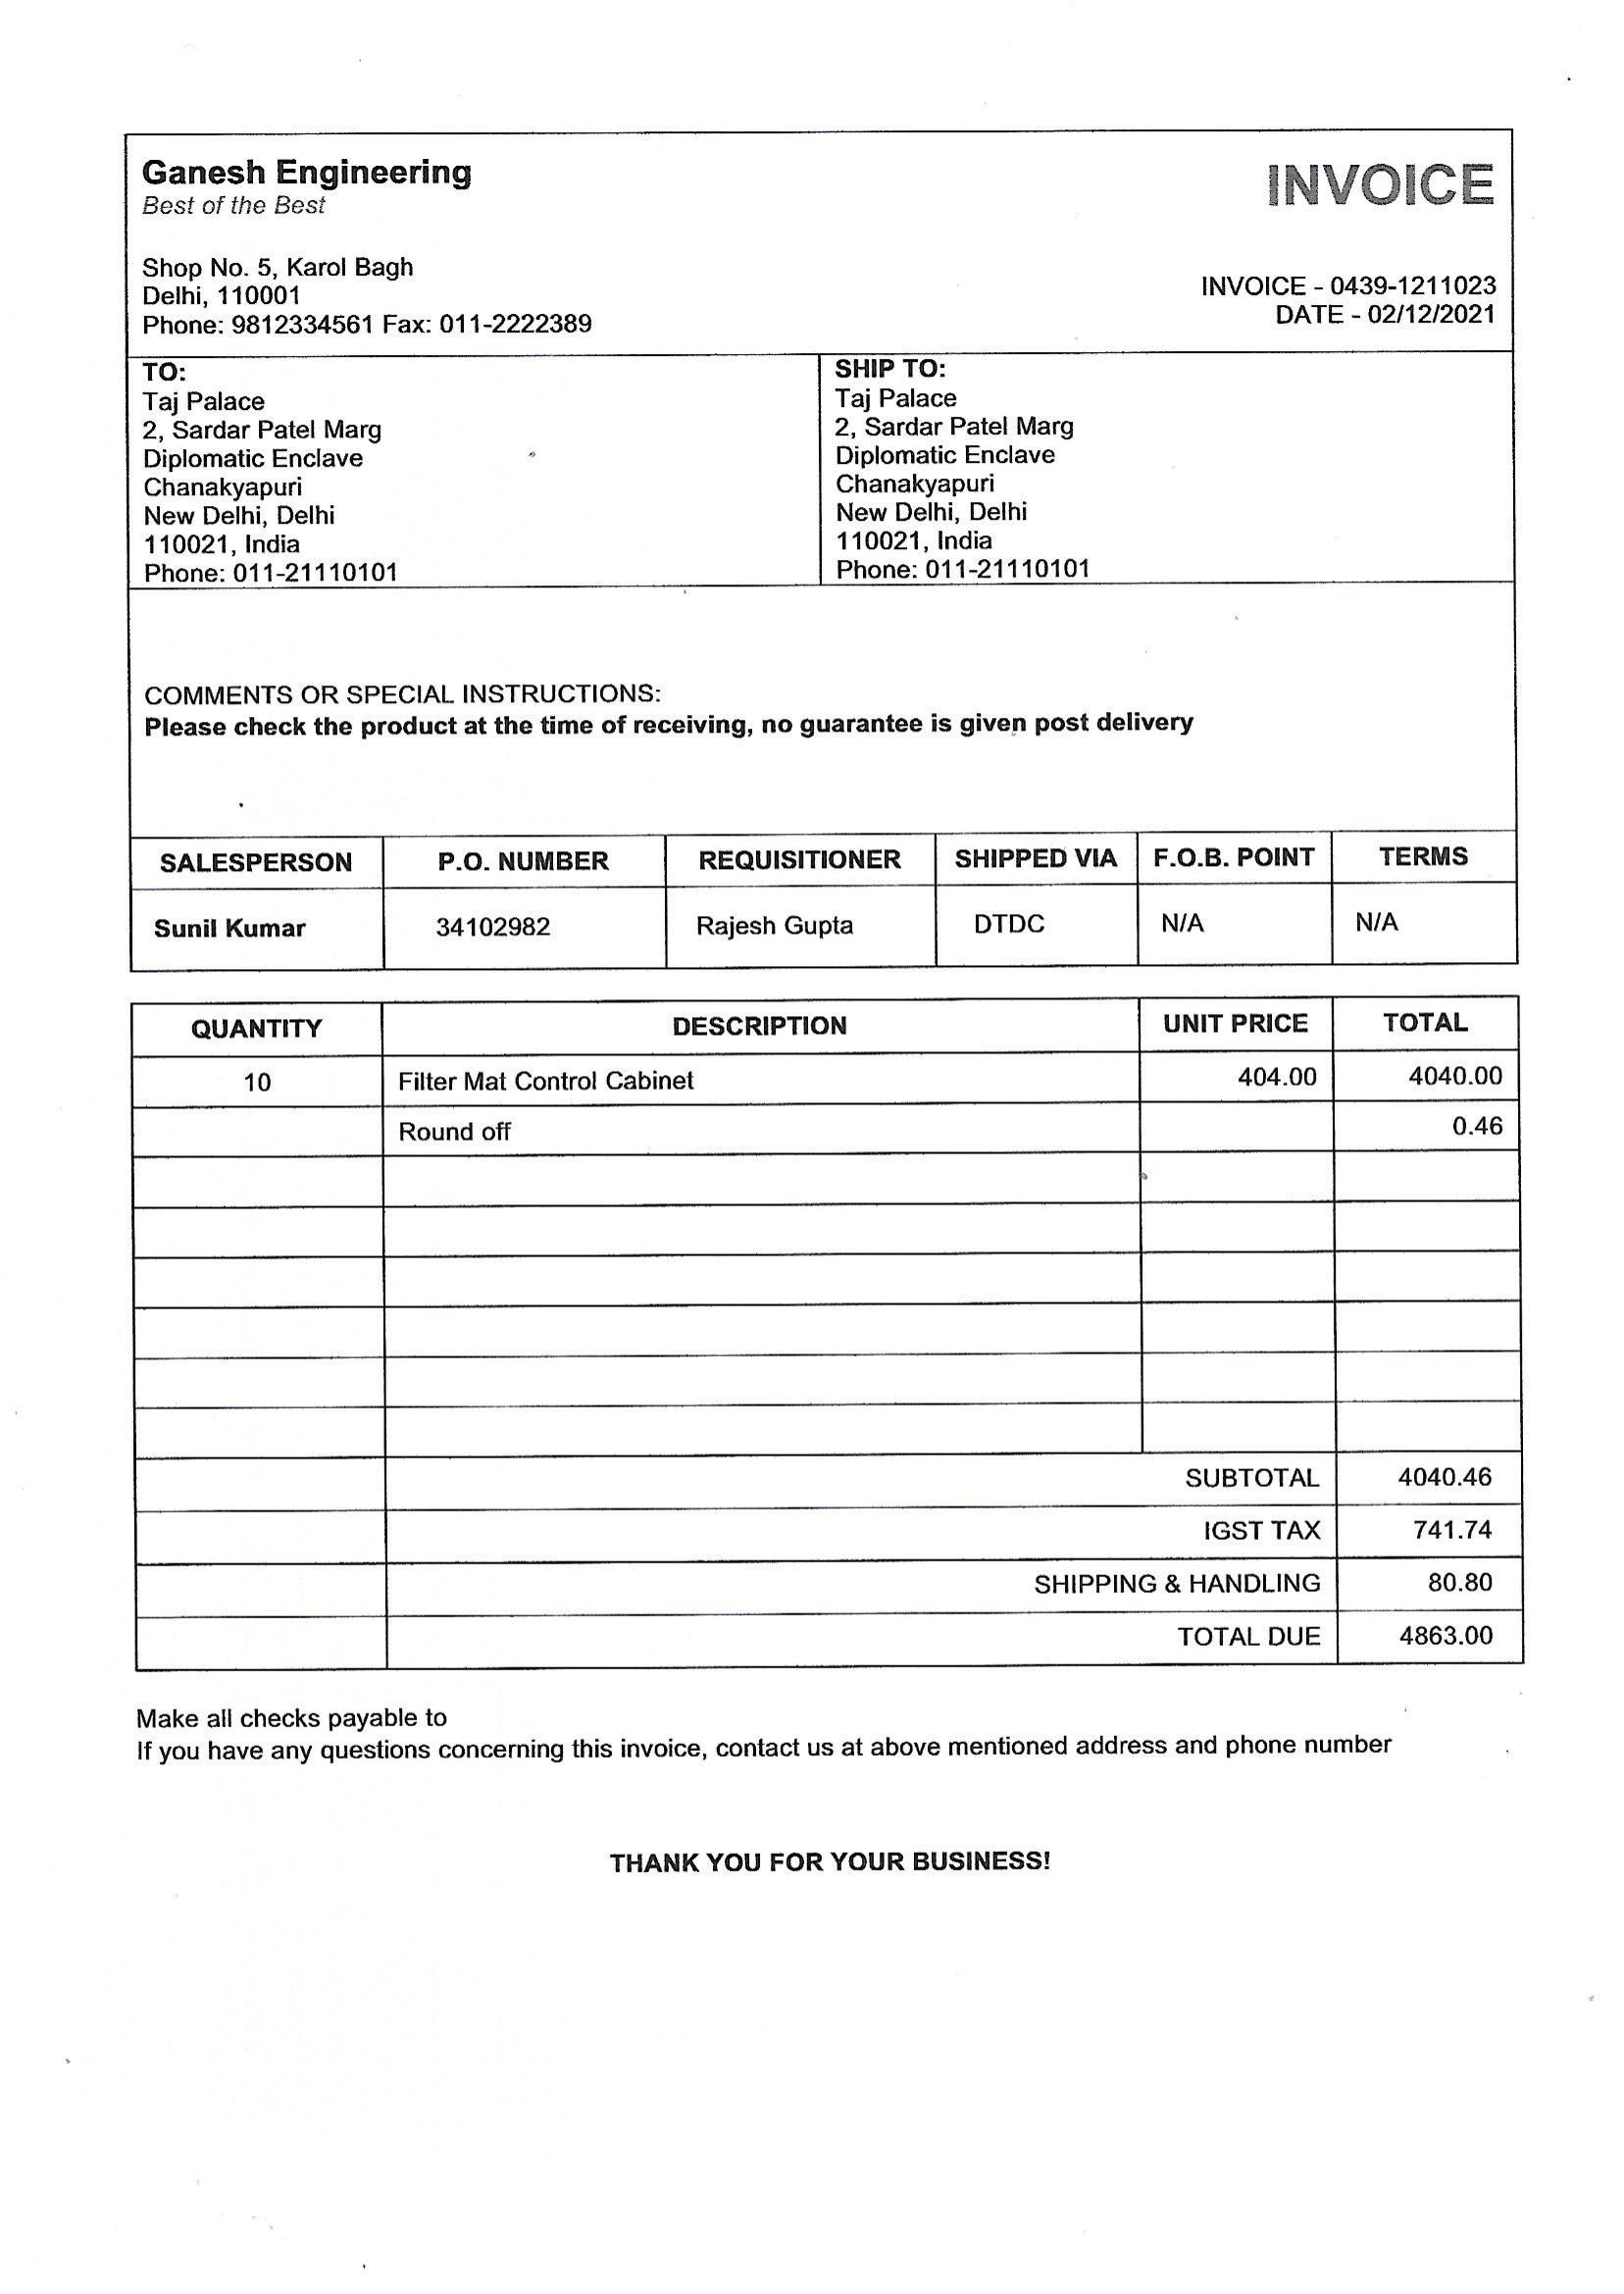

In [9]:
## Load sample image using cv2
img_cv = cv2.imread(sample1_jpg)
print('Invoice_Bill_Scanned')
cv2_imshow(img_cv)
# cv2.waitKey(0)
# cv2.destroyAllWindows

In [10]:
## Read the 
gray_image = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
content = pyt.image_to_string(gray_image,  lang="eng", config="--psm 12")
print(content)

Ganesh Engineering

Best of the Best

INVOICE

Shop No. 5, Karol Bagh

Delhi, 110001

INVOICE - 0439-1211023

Phone: 9812334561 Fax: 011-2222389

DATE - 02/12/2021

TO

SHIP TO

Taj Palace

Taj Palace

2, Sardar Patel Marg

2, Sardar Patel Marg

Diplomatic Enclave

Diplomatic Enclave

Chanakyapuri

Chanakyapuri

New Delhi, Delhi

New Delhi, Dethi

110021, India

110021, India

Phone: 011-21110101

Phone: 011-21110101

COMMENTS OR SPECIAL INSTRUCTIONS

Please check the product at the time of receiving, no guarantee is given post delivery

SALESPERSON |

P.O. NUMBER

REQUISITIONER

SHIPPED VIA | F.O.B. POINT

TERMS

Sunil Kumar

34102982

Rajesh Gupta

DTDC

N/A

N/A

QUANTITY

DESCRIPTION

UNIT PRICE

TOTAL

4040.00

0.46

Tr

Pe ee

le

I

SUBTOTAL t 4040.46

IGST TAX

741 74 |

SHIPPING & HANDLING | 80.80

TOTAL DUE

4863.00

L

Make all checks payable to

If you have any questions concerning this invoice, contact us at above mentioned address and phone number

THANK YOU FOR YOUR BUSI

In [11]:
img_cv.shape

(2339, 1656, 3)

## Method_2 : Easy OCR

In [12]:
reader = easyocr.Reader(['en'], gpu = False)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [13]:
results = reader.readtext(img_cv)  ## results comes in the form of a tuple
results

[([[142, 154], [488, 154], [488, 202], [142, 202]],
  'Ganesh Engineering',
  0.829768929218225),
 ([[1284, 156], [1530, 156], [1530, 218], [1284, 218]],
  'INVOICE',
  0.999541061708594),
 ([[142, 196], [336, 196], [336, 222], [142, 222]],
  'Best of the Best',
  0.8642986195855087),
 ([[139, 255], [427, 255], [427, 294], [139, 294]],
  'Shop No 5, Karol Bagh',
  0.5460405348836735),
 ([[144, 286], [310, 286], [310, 316], [144, 316]],
  'Delhi, 110001',
  0.5949666285775582),
 ([[1222, 276], [1338, 276], [1338, 308], [1222, 308]],
  'INVOICE',
  0.9998965927425801),
 ([[1352, 276], [1532, 276], [1532, 306], [1352, 306]],
  '0439-1211023',
  0.8644571714908544),
 ([[141, 315], [608, 315], [608, 346], [141, 346]],
  'Phone: 9812334561 Fax: 011-2222389',
  0.9456587077063355),
 ([[1300, 306], [1376, 306], [1376, 336], [1300, 336]],
  'DATE',
  0.9999676942825317),
 ([[1390, 306], [1528, 306], [1528, 336], [1390, 336]],
  '02/12/2021',
  0.9973763035055372),
 ([[144, 364], [194, 364], [19

In [14]:
results[0]

([[142, 154], [488, 154], [488, 202], [142, 202]],
 'Ganesh Engineering',
 0.829768929218225)

In [15]:
## Convert this into the dataframe and we will check
df_easyocr = pd.DataFrame(results, columns = ['pos','text','conf'])

In [16]:
df_easyocr.head()

,pos,text,conf
0,"[[142, 154], [488, 154], [488, 202], [142, 202]]",Ganesh Engineering,0.829769
1,"[[1284, 156], [1530, 156], [1530, 218], [1284,...",INVOICE,0.999541
2,"[[142, 196], [336, 196], [336, 222], [142, 222]]",Best of the Best,0.864299
3,"[[139, 255], [427, 255], [427, 294], [139, 294]]","Shop No 5, Karol Bagh",0.546041
4,"[[144, 286], [310, 286], [310, 316], [144, 316]]","Delhi, 110001",0.594967


In [17]:
results_easyocr = df_easyocr[['text','pos']].values.tolist()
results_easyocr

[['Ganesh Engineering', [[142, 154], [488, 154], [488, 202], [142, 202]]],
 ['INVOICE', [[1284, 156], [1530, 156], [1530, 218], [1284, 218]]],
 ['Best of the Best', [[142, 196], [336, 196], [336, 222], [142, 222]]],
 ['Shop No 5, Karol Bagh', [[139, 255], [427, 255], [427, 294], [139, 294]]],
 ['Delhi, 110001', [[144, 286], [310, 286], [310, 316], [144, 316]]],
 ['INVOICE', [[1222, 276], [1338, 276], [1338, 308], [1222, 308]]],
 ['0439-1211023', [[1352, 276], [1532, 276], [1532, 306], [1352, 306]]],
 ['Phone: 9812334561 Fax: 011-2222389',
  [[141, 315], [608, 315], [608, 346], [141, 346]]],
 ['DATE', [[1300, 306], [1376, 306], [1376, 336], [1300, 336]]],
 ['02/12/2021', [[1390, 306], [1528, 306], [1528, 336], [1390, 336]]],
 ['TO:', [[144, 364], [194, 364], [194, 394], [144, 394]]],
 ['SHIP TO:', [[848, 362], [968, 362], [968, 390], [848, 390]]],
 ['Taj Palace', [[142, 394], [274, 394], [274, 426], [142, 426]]],
 ['Taj Palace', [[850, 392], [980, 392], [980, 424], [850, 424]]],
 ['2, S

In [18]:
easy_results = [(x[0], np.array(x[1])) for x in results_easyocr]
easy_results

[('Ganesh Engineering', array([[142, 154],
         [488, 154],
         [488, 202],
         [142, 202]])), ('INVOICE', array([[1284,  156],
         [1530,  156],
         [1530,  218],
         [1284,  218]])), ('Best of the Best', array([[142, 196],
         [336, 196],
         [336, 222],
         [142, 222]])), ('Shop No 5, Karol Bagh', array([[139, 255],
         [427, 255],
         [427, 294],
         [139, 294]])), ('Delhi, 110001', array([[144, 286],
         [310, 286],
         [310, 316],
         [144, 316]])), ('INVOICE', array([[1222,  276],
         [1338,  276],
         [1338,  308],
         [1222,  308]])), ('0439-1211023', array([[1352,  276],
         [1532,  276],
         [1532,  306],
         [1352,  306]])), ('Phone: 9812334561 Fax: 011-2222389',
  array([[141, 315],
         [608, 315],
         [608, 346],
         [141, 346]])), ('DATE', array([[1300,  306],
         [1376,  306],
         [1376,  336],
         [1300,  336]])), ('02/12/2021', array([[

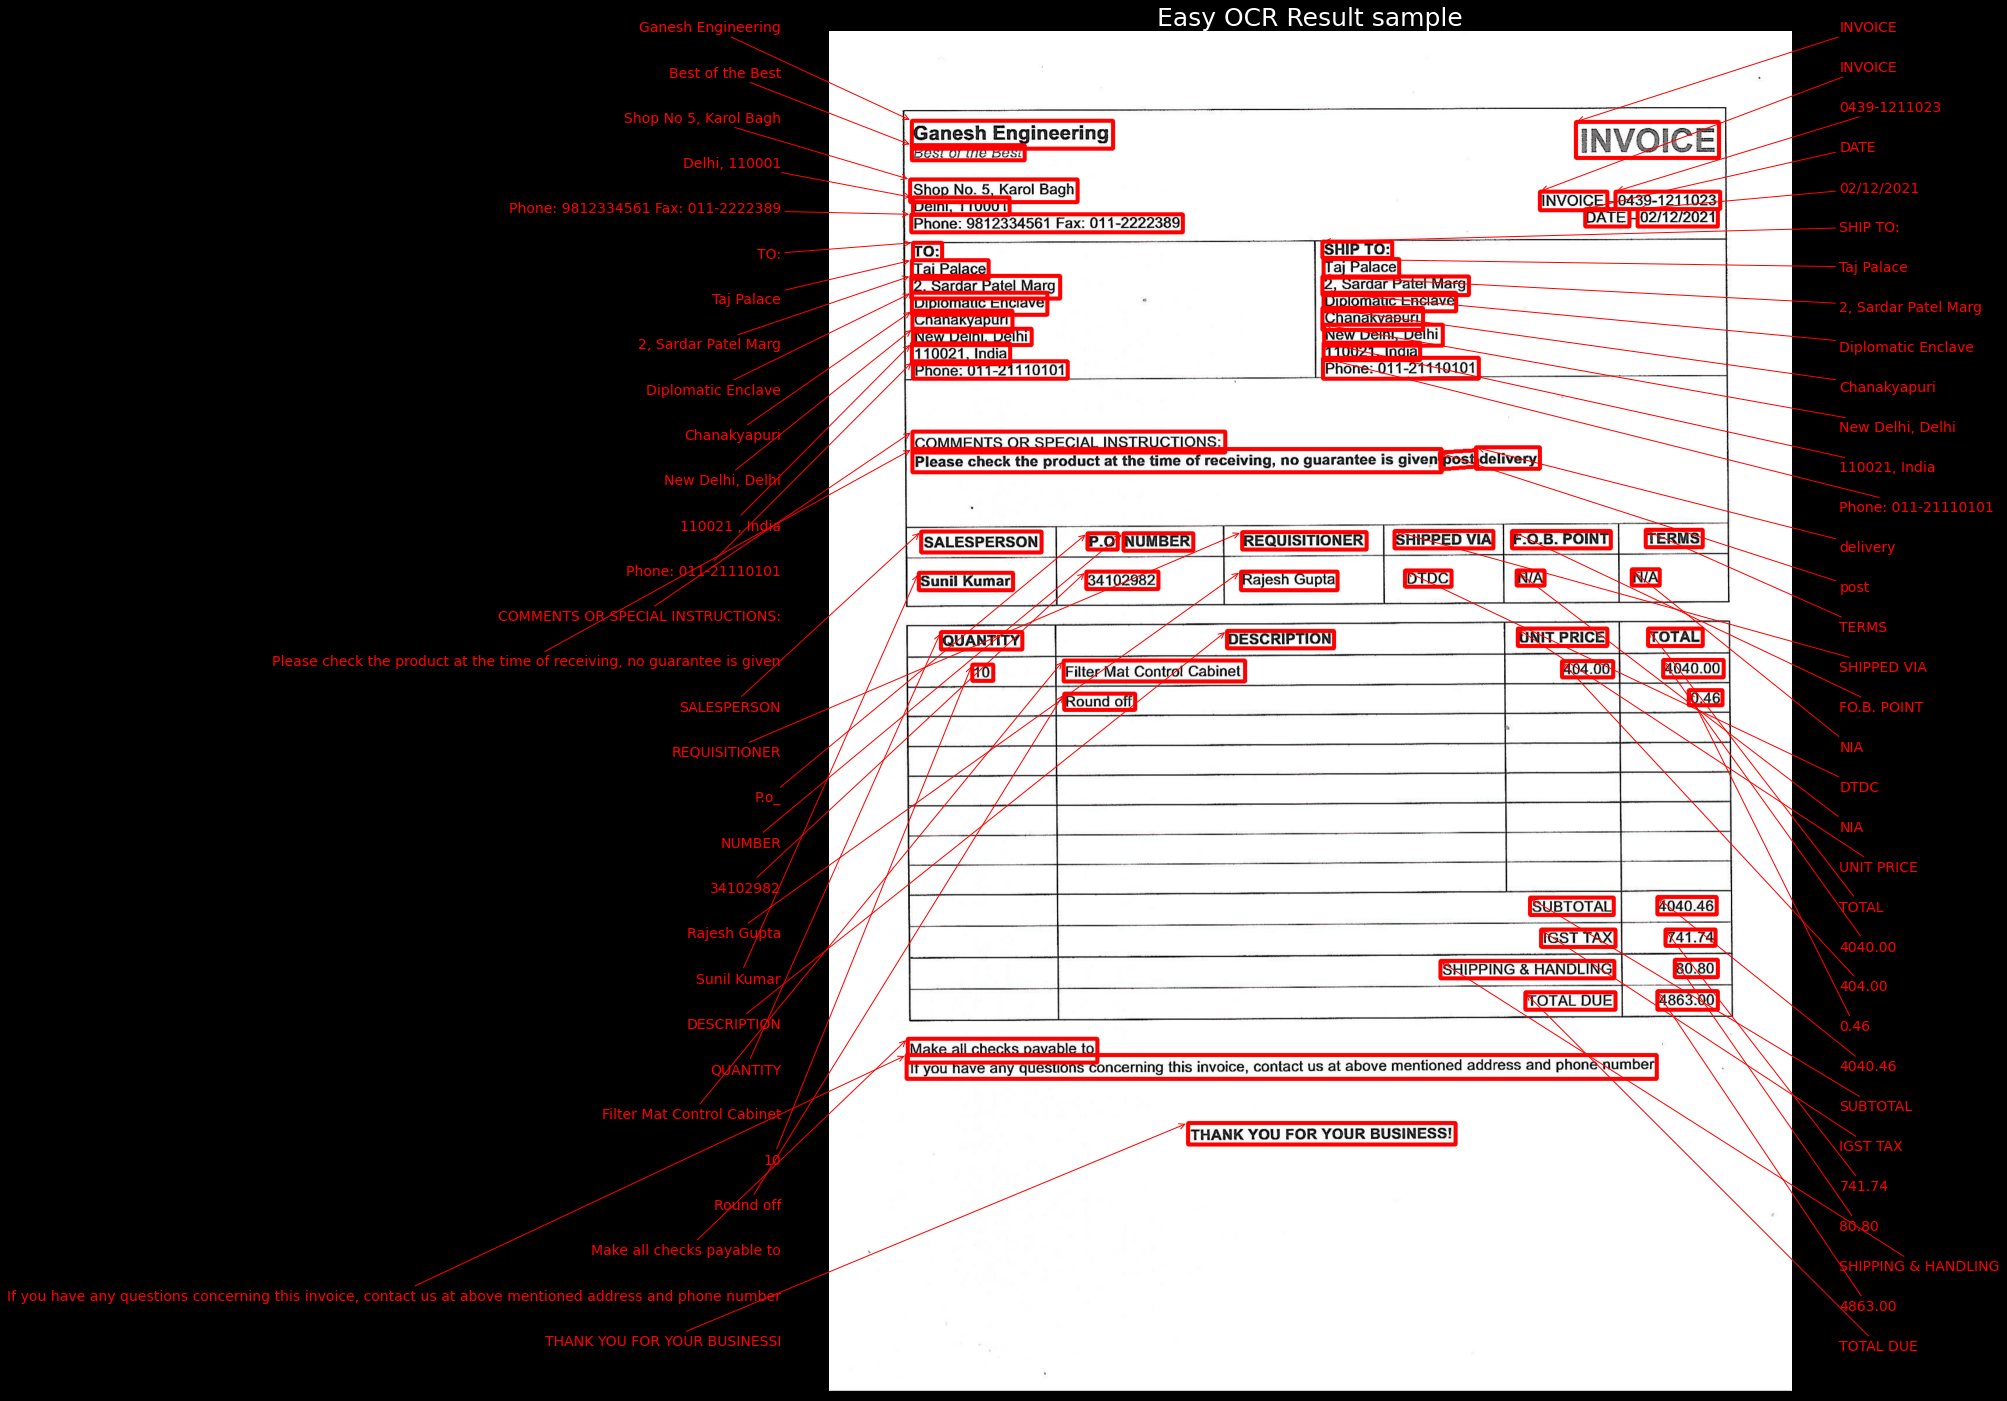

In [19]:
## Annotation from easy ocr
fig, ax = plt.subplots(figsize = (25,25))

keras_ocr.tools.drawAnnotations(img_cv,easy_results, ax = ax)
ax.set_title('Easy OCR Result sample', fontsize = 25)
plt.show()